# Mini Project

In [1]:
import twitter
import json

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = "xxxx"
CONSUMER_SECRET ="xxxx"
OAUTH_TOKEN = "xxxx"
OAUTH_TOKEN_SECRET = "xxxx"

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print (twitter_api)

## Example 5. Collecting search results

In [10]:
# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.
#q = '#XXX'
q = '#Kitchenaid + #KitchenAid + kitchenaid + KitchenAid'

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print ("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
#json.dumps(statuses[0], indent=1)

print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 403
{
 "created_at": "Fri Dec 20 06:28:45 +0000 2019",
 "id": 1207910691421577216,
 "id_str": "1207910691421577216",
 "text": "Enter To Win The KitchenAid 5qt Artisan Tilt-Head Stand Mixer Giveaway  @dealmaxxdeals #kitchenaid https://t.co/nKNUmqYuHX",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "kitchenaid",
    "indices": [
     87,
     98
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "dealmaxxdeals",
    "name": "dealmaxxdeals",
    "id": 1087544330930266112,
    "id_str": "1087544330930266112",
    "indices": [
     72,
     86
    ]
   }
  ],
  "urls": [
   {
    "url": "https://t.co/nKNUmqYuHX",
    "expanded_url": "https://swee.ps/IQiHdKIHj",
    "display_url": "swee.ps/IQiHdKIHj",
    "indices": [
     99,
     122
    ]
   }
  ]
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "sour

## Example 6. Extracting text, screen names, and hashtags from tweets

In [11]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1))
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))

[
 "Enter To Win The KitchenAid 5qt Artisan Tilt-Head Stand Mixer Giveaway  @dealmaxxdeals #kitchenaid https://t.co/nKNUmqYuHX",
 "Making Gma's cookies...shhhhh, it's a secret recipe! #baking #kitchenaid #vintage #cookies #christmascookies\u2026 https://t.co/yCn8xlrlvy",
 "I have had this Kitchenaid mixer since 2012. And it's sounded like this since day one. I can only use during commer\u2026 https://t.co/1dYBWs89xK",
 "Pourquoi vous allez craquer pour la Nespresso #Kitchenaid ! https://t.co/fEsvRrfzEs https://t.co/XKekjspf11",
 "RT @WordSpelunker: all year i've been saving a little each month for a #KitchenAid stand mixer &amp; now i'm only $100 away! it'll take me awhi\u2026"
]
[
 "dealmaxxdeals",
 "WordSpelunker",
 "dealmaxxdeals",
 "Markybhoy9",
 "FrenchieMummy"
]
[
 "kitchenaid",
 "baking",
 "kitchenaid",
 "vintage",
 "cookies"
]
[
 "Enter",
 "To",
 "Win",
 "The",
 "KitchenAid"
]


In [12]:
from nltk.corpus import stopwords
import string

#change to lower cases to ignore sensitivity of upper and lower case
words = [word.lower() for word in words]
screen_names = [word.lower() for word in screen_names]
hashtags = [word.lower() for word in hashtags]

punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']        

for word in list(words):
    if word in stop:
        words.remove(word)

#new list of words without RT
words = [word for word in words if word not in stop]

from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10

[('#kitchenaid', 196), ('mixer', 112), ('last', 109), ('made', 109), ('monthly', 108), ('highlights', 108), ('post', 108), ('eventually', 108), ('live', 108), (':)', 108)]
[('frenchiemummy', 107), ('dealmaxxdeals', 32), ('kitchenaidafric', 24), ('allan_hirsch', 22), ('cdn_turkey', 19), ('taranoland', 18), ('kitchenaidusa', 13), ('ebay', 7), ('realliferealiss', 7), ('mishimoto', 5)]
[('kitchenaid', 198), ('win', 57), ('food', 21), ('giveaway', 20), ('kitchen', 11), ('kitchenware', 7), ('kitchener', 7), ('baking', 6), ('chef', 5), ('kitchenaidmixer', 4)]


## Example 7. Creating a basic frequency distribution from the words in tweets

In [13]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10

[('#kitchenaid', 196), ('mixer', 112), ('last', 109), ('made', 109), ('monthly', 108), ('highlights', 108), ('post', 108), ('eventually', 108), ('live', 108), (':)', 108)]
[('frenchiemummy', 107), ('dealmaxxdeals', 32), ('kitchenaidafric', 24), ('allan_hirsch', 22), ('cdn_turkey', 19), ('taranoland', 18), ('kitchenaidusa', 13), ('ebay', 7), ('realliferealiss', 7), ('mishimoto', 5)]
[('kitchenaid', 198), ('win', 57), ('food', 21), ('giveaway', 20), ('kitchen', 11), ('kitchenware', 7), ('kitchener', 7), ('baking', 6), ('chef', 5), ('kitchenaidmixer', 4)]


## Example 8. Using prettytable to display tuples in a nice tabular format

In [14]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print (pt)

+-------------+-------+
| Word        | Count |
+-------------+-------+
| #kitchenaid |   196 |
| mixer       |   112 |
| last        |   109 |
| made        |   109 |
| monthly     |   108 |
| highlights  |   108 |
| post        |   108 |
| eventually  |   108 |
| live        |   108 |
| :)          |   108 |
+-------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| frenchiemummy   |   107 |
| dealmaxxdeals   |    32 |
| kitchenaidafric |    24 |
| allan_hirsch    |    22 |
| cdn_turkey      |    19 |
| taranoland      |    18 |
| kitchenaidusa   |    13 |
| ebay            |     7 |
| realliferealiss |     7 |
| mishimoto       |     5 |
+-----------------+-------+
+-----------------+-------+
| Hashtag         | Count |
+-----------------+-------+
| kitchenaid      |   198 |
| win             |    57 |
| food            |    21 |
| giveaway        |    20 |
| kitchen         |    11 |
| kitchenware     |     7 |
| kitchener       | 

## Example 9. Calculating lexical diversity for tweets

In [15]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print (lexical_diversity(words))
print (lexical_diversity(screen_names))
print (lexical_diversity(hashtags))
print (average_words(status_texts))

0.2598075499629904
0.16293929712460065
0.264
19.213399503722083


## Example 12. Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

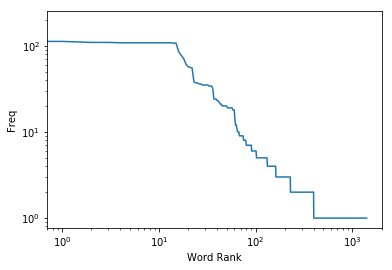

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Example 13. Generating histograms of words, screen names, and hashtags

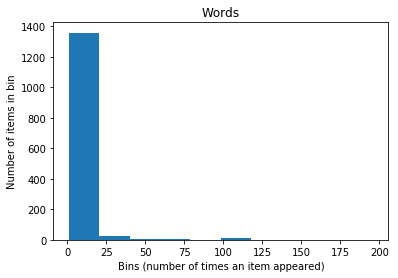

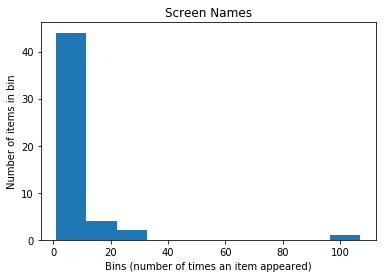

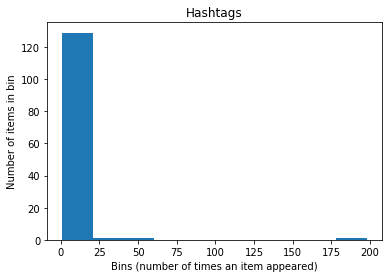

<Figure size 432x288 with 0 Axes>

In [17]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()